In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
%pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.model_selection import train_test_split


Note: you may need to restart the kernel to use updated packages.


In [7]:
data=pd.read_csv(r'StudentsPerformance.csv')
df=pd.DataFrame(data)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
x=df.drop('math score',axis=1)
y=df['math score']

In [9]:
models={'LinearRegression':LinearRegression(),
        'RandomForest':RandomForestRegressor(),
        'GradientBoosting':GradientBoostingRegressor(),
        'AdaBoost':AdaBoostRegressor(),
        'DecisionTree':DecisionTreeRegressor(),
        'SVR':SVR(),
        'KNeighbors':KNeighborsRegressor(),
        'XGB':XGBRegressor()}

In [ ]:
num_cols=x.select_dtypes(exclude=['object']).columns
cat_cols=x.select_dtypes(include=['object']).columns

In [12]:
for i in cat_cols:
    print(str(i).capitalize())
    print(f'no of unique values in {i} is {x[i].nunique()}')
    print(f'unique values in {i} are {x[i].unique()}')
    print('------------------------------------')

Gender
no of unique values in gender is 2
unique values in gender are ['female' 'male']
------------------------------------
Race/ethnicity
no of unique values in race/ethnicity is 5
unique values in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------
Parental level of education
no of unique values in parental level of education is 6
unique values in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------
Lunch
no of unique values in lunch is 2
unique values in lunch are ['standard' 'free/reduced']
------------------------------------
Test preparation course
no of unique values in test preparation course is 2
unique values in test preparation course are ['none' 'completed']
------------------------------------


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

s=StandardScaler()
ohe=OneHotEncoder()

In [16]:
preprocessor=ColumnTransformer(
    [('OneHotEncoder',ohe,cat_cols),
    ('StandardScaler',s,num_cols)]
)

In [18]:
x=preprocessor.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model_list=[]
r2_score_list=[]
mse_list=[]
mae_list=[]
model_evaluation={'Model':model_list,
                  'r2_score':r2_score_list,
                  'Mean Squared Error':mse_list,
                  'Mean Absolute Error':mae_list}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    model_list.append(name)
    
model_evaluation=pd.DataFrame(model_evaluation).sort_values('r2_score',ascending=False)
print(model_evaluation)

              Model  r2_score  Mean Squared Error  Mean Absolute Error
0  LinearRegression  0.880433           29.095170             4.214763
2  GradientBoosting  0.872158           31.108899             4.308914
3          AdaBoost  0.852253           35.952539             4.652519
1      RandomForest  0.848411           36.887321             4.666829
7               XGB  0.827797           41.903706             5.057731
6        KNeighbors  0.783813           52.606600             5.621000
4      DecisionTree  0.745992           61.810000             6.170000
5               SVR  0.728600           66.042005             5.401539


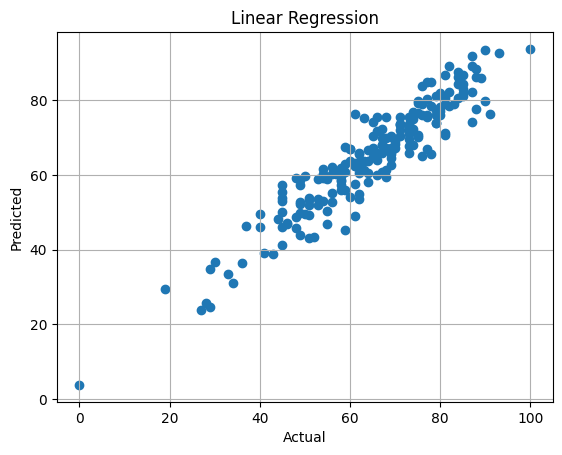

In [25]:
lin_plot=LinearRegression(fit_intercept=True)
lin_plot.fit(x_train,y_train)
y_pred=lin_plot.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.grid()
plt.show()

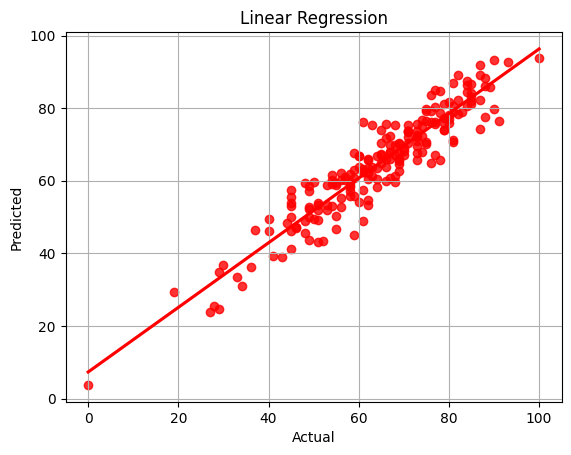

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [28]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

In [29]:
pred_df.head()

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
